# Random Variables | Theory and sample use case

In [17]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as stats
from statsmodels.stats import stattools

%matplotlib inline
sns.set()

## Discrete Random Variables

In [18]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high+1, numberOfSamples)
        return samples

### Uniform Distribution

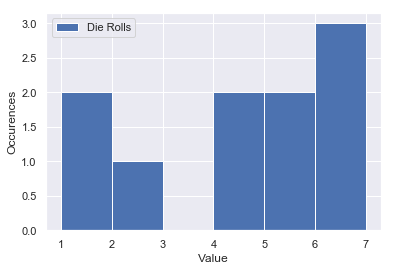

In [19]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

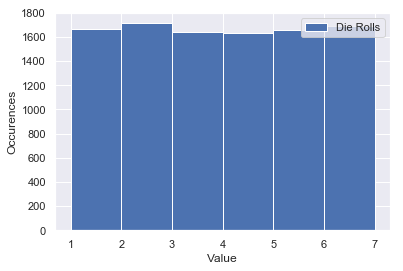

In [20]:
plt.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

### Binomial Distribution
A binomial distribution is used to describe successes and failures.

In [21]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

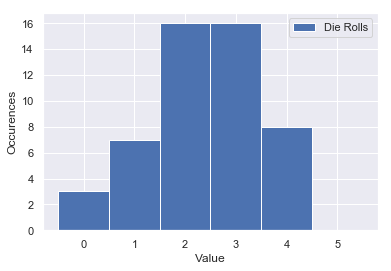

In [24]:
StockProbabilities = BinomialRandomVariable(5, 0.50)
plt.hist(StockProbabilities.draw(50), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

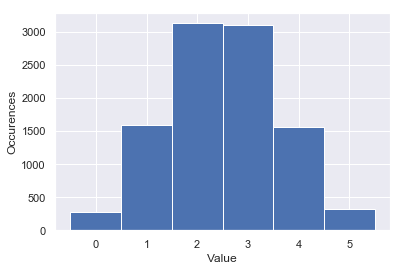

In [25]:
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

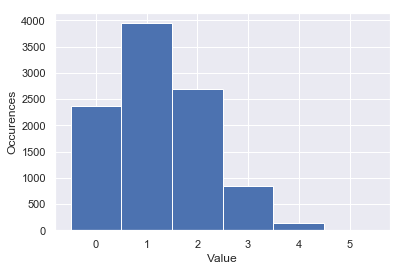

In [26]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

## Continuous Random Variables

In [27]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

### Uniform distribution

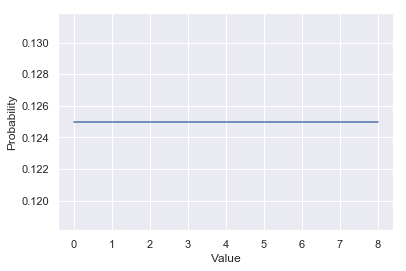

In [28]:
a = 0.0
b = 8.0
x = np.linspace(a, b, 100)
y = [1/(b-a) for i in x]
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Probability');

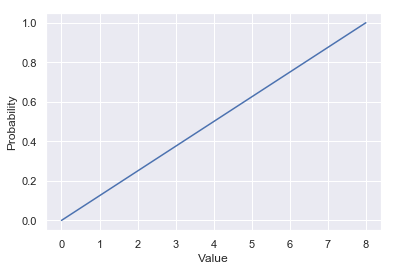

In [29]:
y = [(i - a)/(b - a) for i in x]
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Probability');

### Normal Distribution

In [30]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean = 0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

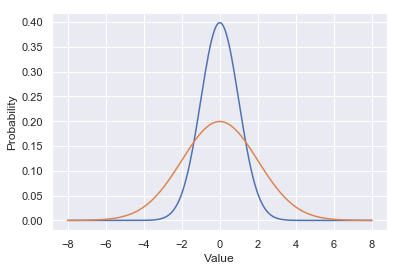

In [31]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = (1/(sigma_1 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_1)*(x - mu_1) / (2 * sigma_1 * sigma_1))
z = (1/(sigma_2 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_2)*(x - mu_2) / (2 * sigma_2 * sigma_2))
plt.plot(x, y, x, z)
plt.xlabel('Value')
plt.ylabel('Probability');

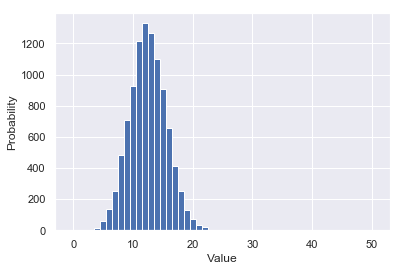

In [32]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / np.sqrt(n * p * (1 - p))

plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Value')
plt.ylabel('Probability');

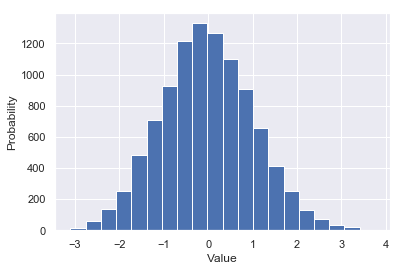

In [33]:
plt.hist(Z_samples, bins=20)
plt.xlabel('Value')
plt.ylabel('Probability');

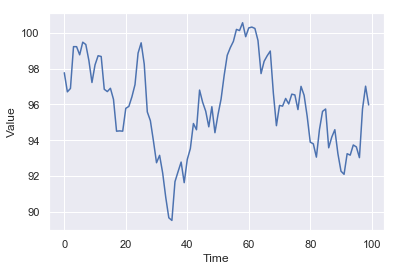

In [35]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(100) # generate 100 daily returns
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.xlabel('Time')
plt.ylabel('Value');

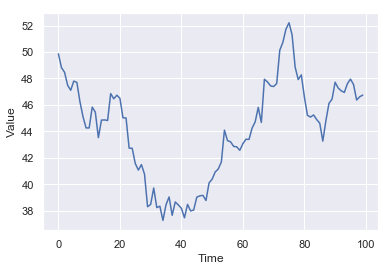

In [36]:
Z_initial = 50
Z_returns = X.draw(100)
Z = pd.Series(np.cumsum(Z_returns), name = 'Z') + Z_initial
Z.plot()
plt.xlabel('Time')
plt.ylabel('Value');

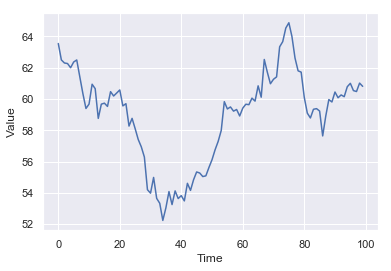

In [37]:
Y_quantity = 20
Z_quantity = 50
Y_weight = Y_quantity/(Y_quantity + Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.xlabel('Time')
plt.ylabel('Value');

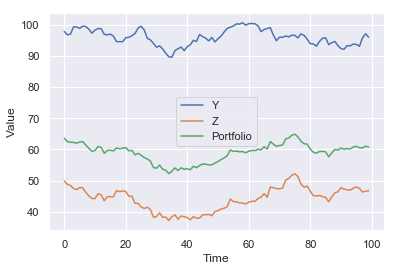

In [38]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.xlabel('Time')
plt.ylabel('Value');

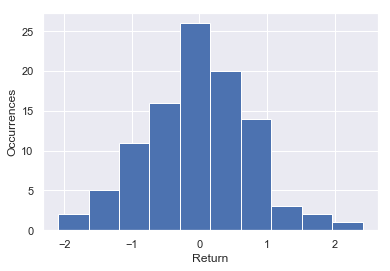

In [39]:
plt.hist(W_returns);
plt.xlabel('Return')
plt.ylabel('Occurrences');

## Fitting a Distribution

In [40]:
import fix_yahoo_finance as yf
from datetime import datetime
start="2008-01-01"
end=datetime.now().strftime ("%Y-%m-%d")

[*********************100%***********************]  1 of 1 downloaded
The JB test p-value is:  0.0
We reject the hypothesis that the data are normally distributed  True
The skewness of the returns is:  2.51884201231097
The kurtosis of the returns is:  24.464108077561313


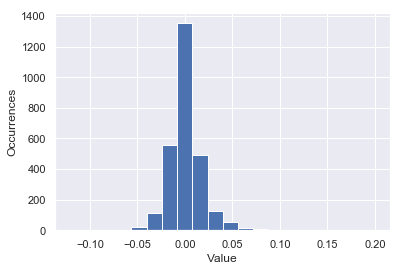

In [44]:
MERCK = yf.download('MERCK.NS', start=start, end=end)
prices = MERCK['Adj Close']

# Take the daily returns
returns = prices.pct_change()[1:]

#Set a cutoff
cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = stattools.jarque_bera(returns)
print ("The JB test p-value is: ", p_value)
print ("We reject the hypothesis that the data are normally distributed ", p_value < cutoff)
print ("The skewness of the returns is: ", skewness)
print ("The kurtosis of the returns is: ", kurtosis)
plt.hist(returns, bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

The first thing to check is whether the returns actually exhibit properties of a normal distribution. For this purpose, we will use the Jarque-Bera test, which indicates non-normality if the p-value is below a cutoff.

In [45]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns)
sample_std_dev = np.std(returns)

Now let's see how a theoretical normal curve fits against the actual values.

/Users/adhiman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


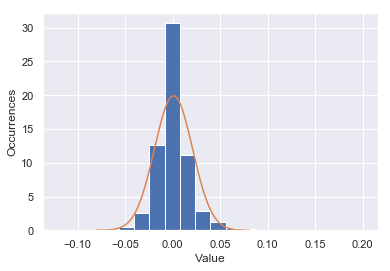

In [46]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.hist(returns, bins = 20, normed = True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');

Our theoretical curve for the returns has a substantially lower peak than the actual values, which makes sense because the returns are not actually normally distributed. The kurtosis of the normal distribution is  3. A higher kurtosis leads to a higher peak. 